## Feature Engineering with Linear Regression using Ames Housing Data

In this notebook, we will build some linear regression models to predict housing prices from this data.


> 1. Simple EDA and baseline our model
> 2. Feature Engineering : adding polynomial terms
> 3. Feature Engineering : adding interaction terms


Some of the basic steps which we will also perform are:
> 1. Splitting our data in train test split
> 2. EDA
> 3. MAE - Mean Absolute Error as our error metric

### 1. Simple EDA and baseline of our model

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries has been imported!")

Libraries has been imported!


#### Load up our dataset

In [2]:
url = "https://bit.ly/316tYZT"
df = pd.read_csv(url)
df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2,215000
1,11622,5,6,1961,1961,896,1,2,0,1,105000
2,14267,6,6,1958,1958,1329,1,3,0,1,172000
3,11160,7,5,1968,1968,2110,2,3,2,2,244000
4,13830,5,5,1997,1998,1629,2,3,1,2,189900


In [3]:
df.describe()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,10103.583590,6.088205,5.563761,1971.302906,1984.234188,1493.978803,1.564786,2.853675,0.596923,1.764444,180411.574701
std,7781.999124,1.402953,1.112262,30.242474,20.861774,486.273646,0.551386,0.827737,0.645349,0.760405,78554.857286
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7438.000000,5.000000,5.000000,1954.000000,1965.000000,1126.000000,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9428.000000,6.000000,5.000000,1973.000000,1993.000000,1441.000000,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,11515.000000,7.000000,6.000000,2001.000000,2004.000000,1740.000000,2.000000,3.000000,1.000000,2.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,3820.000000,4.000000,8.000000,4.000000,5.000000,625000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Area        2925 non-null   int64
 1   Overall Qual    2925 non-null   int64
 2   Overall Cond    2925 non-null   int64
 3   Year Built      2925 non-null   int64
 4   Year Remod/Add  2925 non-null   int64
 5   Gr Liv Area     2925 non-null   int64
 6   Full Bath       2925 non-null   int64
 7   Bedroom AbvGr   2925 non-null   int64
 8   Fireplaces      2925 non-null   int64
 9   Garage Cars     2925 non-null   int64
 10  SalePrice       2925 non-null   int64
dtypes: int64(11)
memory usage: 251.5 KB


#### Let's do some EDA  - Correlation analysis

In [5]:
cor = df.corr()

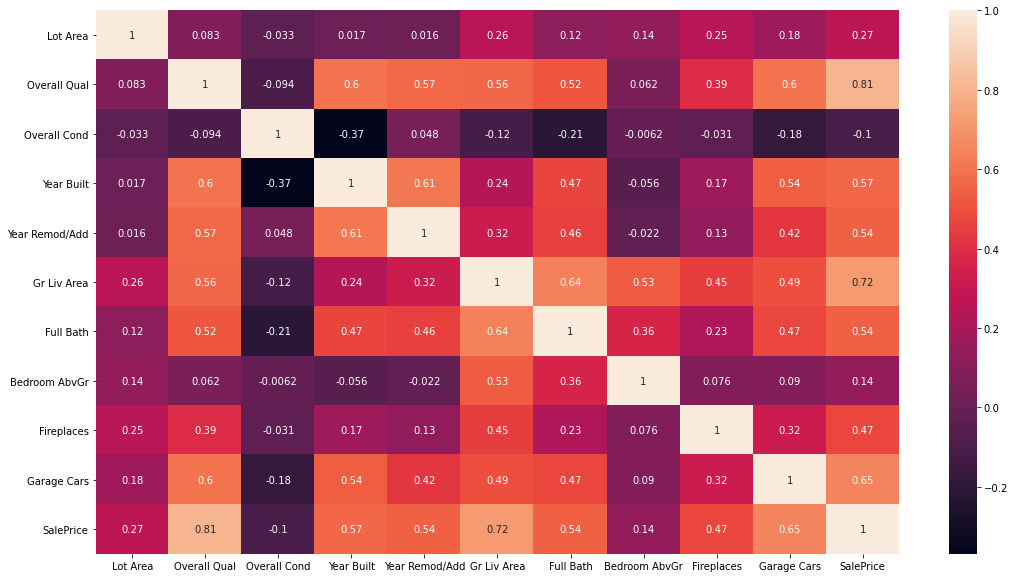

In [6]:
plt.figure(figsize=(18,10))
sns.heatmap(cor, annot=True)

#### Obtain our X and y

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

#### Perform train test split, 80/20, To baseline our model.

In [8]:
from sklearn.model_selection import train_test_split #import train test split

In [9]:
from sklearn.linear_model import LinearRegression #Step 1 : import our model
from sklearn.metrics import mean_absolute_error

In [17]:
#baseline model and functionalise our code
def split_n_train(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    regressor = LinearRegression() #step 2: instantiate our model
    regressor.fit(X_train, y_train)#Step 3: train our model
    y_pred = regressor.predict(X_test)#Step 4: get predictions
    #Step 5: model evaluation metric
    print("Mean Absolute Error in terms of Sales Price: "
          ,mean_absolute_error(y_test, y_pred))

In [18]:
split_n_train(X,y)#baseline model

Mean Absolute Error in terms of Sales Price:  23315.163572353777


### 2. Feature Engineering: adding polynomial terms

We want to improve our sales price score in terms of MAE! The lower the score the better our model is doing!

We want to use what we have seen in our correlation analysis, so that we can add in higher order terms.

We are still working in linear terms, just that now if we add polynomial terms, our model becomes <b>quadratic in nature</b>!

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Area        2925 non-null   int64
 1   Overall Qual    2925 non-null   int64
 2   Overall Cond    2925 non-null   int64
 3   Year Built      2925 non-null   int64
 4   Year Remod/Add  2925 non-null   int64
 5   Gr Liv Area     2925 non-null   int64
 6   Full Bath       2925 non-null   int64
 7   Bedroom AbvGr   2925 non-null   int64
 8   Fireplaces      2925 non-null   int64
 9   Garage Cars     2925 non-null   int64
dtypes: int64(10)
memory usage: 228.6 KB


In [20]:
X2 = X.copy()
X2["OQ2"] = X2["Overall Qual"] ** 2
X2["GLA2"] = X2["Gr Liv Area"] ** 2

In [21]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Area        2925 non-null   int64
 1   Overall Qual    2925 non-null   int64
 2   Overall Cond    2925 non-null   int64
 3   Year Built      2925 non-null   int64
 4   Year Remod/Add  2925 non-null   int64
 5   Gr Liv Area     2925 non-null   int64
 6   Full Bath       2925 non-null   int64
 7   Bedroom AbvGr   2925 non-null   int64
 8   Fireplaces      2925 non-null   int64
 9   Garage Cars     2925 non-null   int64
 10  OQ2             2925 non-null   int64
 11  GLA2            2925 non-null   int64
dtypes: int64(12)
memory usage: 274.3 KB


In [23]:
X2.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,GLA2
0,31770,6,5,1960,1960,1656,1,3,2,2,36,2742336
1,11622,5,6,1961,1961,896,1,2,0,1,25,802816
2,14267,6,6,1958,1958,1329,1,3,0,1,36,1766241
3,11160,7,5,1968,1968,2110,2,3,2,2,49,4452100
4,13830,5,5,1997,1998,1629,2,3,1,2,25,2653641


In [22]:
split_n_train(X2,y)

Mean Absolute Error in terms of Sales Price:  19822.651950844276


### 3. Feature Engineering : Adding Interaction terms

We can take a look at the possiblity of :
* "Overall Qual" being affected by "Year Built"
* "Overall Qual" being affected by "Lot Area"

In [26]:
X3 = X2.copy()

#multiplication interaction between overall qual and year built
X3["OQ_mul_YB"] = X3["Overall Qual"] * X3["Year Built"]

#division interaction between overall qual and lot area
X3["OQ_div_LA"] = X3["Overall Qual"] / X3["Lot Area"]

In [27]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   int64  
 10  OQ2             2925 non-null   int64  
 11  GLA2            2925 non-null   int64  
 12  OQ_mul_YB       2925 non-null   int64  
 13  OQ_div_LA       2925 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 320.0 KB


In [28]:
split_n_train(X3,y)

Mean Absolute Error in terms of Sales Price:  19345.93789625038


#### Not too bad we were able to get a small boost from using feature engineering with interaction terms!

### Exercise - Add additional interaction/polynomial terms and tune the model to reduce our MAE score!

### End of Feature engineering workshop!